# Batch Gradient Descent

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
from sklearn.model_selection import train_test_split

In [8]:
#Extracting x and y data
with h5py.File('mnist_testdata.hdf5', 'r') as hf:
    xdata = hf['xdata'][:]
    ydata = hf['ydata'][:]

In [9]:
xdata.shape

(10000, 784)

In [10]:
ydata.shape

(10000, 10)

In [11]:
def softmax(X):
    exp_X = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return exp_X / np.sum(exp_X, axis=-1, keepdims=True)

In [12]:
def init(xdata):
    n_samples, n_features = xdata.shape
    classes = 10
    init_weights = np.random.randn(n_features,classes)
    init_bias = np.random.randn(classes)
    return init_weights,init_bias

In [13]:
def feed_forward(X,weights,bias):
    a = np.dot(X,weights) + bias
    yhat = softmax(a)
    return yhat

In [14]:
def compute_loss(y_label,y_pred):
    epsilon = 1e-9   #to avoid log0 calculations
    y = np.sum(y_label*np.log(y_pred + epsilon),axis=1)
    return -np.mean(y)

In [15]:
def compute_accuracy(y_label,y_pred):
    y_true = np.argmax(y_label, axis=1)
    accuracy = np.mean(y_true == y_pred)
    return accuracy

In [125]:
def fit(x_train,y_train,x_test,y_test,lr,epochs):
    weights,bias = init(x_train)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    total_operations = 0
    for epoch in range(epochs):
        softmax_train = np.zeros(x_test.shape)
        softmax_test = np.zeros(y_test.shape)
        train_pred = np.zeros(x_train.shape[0])  # Initialize as NumPy array
        test_pred = np.zeros(x_test.shape[0])
        for i in range(x_train.shape[0]):
            yhat = feed_forward(x_train[i],weights,bias)
            total_operations += x_train.shape[1] + yhat.size
            dw = np.outer(x_train[i],(y_train[i] - yhat)) 
            db = (y_train[i] - yhat)
            total_operations += (x_train.shape[1] * yhat.size) + yhat.size
            weights += lr * dw
            bias += lr * db
        for j in range(x_train.shape[0]):
            softmax_train = feed_forward(x_train[j],weights,bias)
            train_pred[j] = np.argmax(softmax_train)
        loss1 = compute_loss(y_train,softmax_train)
        accuracy1 = compute_accuracy(y_train,train_pred)
        train_loss.append(loss1)
        train_accuracy.append(accuracy1)
        for i in range(x_test.shape[0]):
            softmax_test = feed_forward(x_test[i],weights,bias)
            test_pred[i] = np.argmax(softmax_test)
        loss2 = compute_loss(y_test,softmax_test)
        accuracy2 = compute_accuracy(y_test,test_pred)
        test_loss.append(loss2)
        test_accuracy.append(accuracy2)
        total_operations += (y_train.shape[1] * softmax_train.shape[0])  # For training loss
        total_operations += (y_test.shape[1] * softmax_test.shape[0])    # For testing loss
        print(f'Epoch {epoch+1}/{epochs} => Train Loss: {loss1:.4f}, Test Loss: {loss2:.4f}, Train Accuracy: {accuracy1:.4f}, Test Accuracy: {accuracy2:.4f}')
    print(f'Total operations: {total_operations}')  # Print the total operations
    return weights,bias,train_loss,test_loss,train_accuracy,test_accuracy

In [127]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=15)
x_train.shape

(7000, 784)

In [129]:
y_train.shape

(7000, 10)

In [131]:
weights,bias,train_loss,test_loss,train_accuracy,test_accuracy = fit(x_train,y_train,x_test,y_test,0.01,20)

Epoch 1/20 => Train Loss: 15.1494, Test Loss: 11.0385, Train Accuracy: 0.7961, Test Accuracy: 0.7697
Epoch 2/20 => Train Loss: 15.5868, Test Loss: 10.1747, Train Accuracy: 0.8466, Test Accuracy: 0.8117
Epoch 3/20 => Train Loss: 15.6054, Test Loss: 9.8753, Train Accuracy: 0.8666, Test Accuracy: 0.8390
Epoch 4/20 => Train Loss: 15.5895, Test Loss: 9.7812, Train Accuracy: 0.8814, Test Accuracy: 0.8483
Epoch 5/20 => Train Loss: 15.4977, Test Loss: 9.7044, Train Accuracy: 0.8907, Test Accuracy: 0.8520
Epoch 6/20 => Train Loss: 15.3531, Test Loss: 9.6245, Train Accuracy: 0.8991, Test Accuracy: 0.8560
Epoch 7/20 => Train Loss: 15.2002, Test Loss: 9.5552, Train Accuracy: 0.9043, Test Accuracy: 0.8620
Epoch 8/20 => Train Loss: 15.0520, Test Loss: 9.5048, Train Accuracy: 0.9074, Test Accuracy: 0.8617
Epoch 9/20 => Train Loss: 14.9111, Test Loss: 9.4687, Train Accuracy: 0.9110, Test Accuracy: 0.8650
Epoch 10/20 => Train Loss: 14.7758, Test Loss: 9.4382, Train Accuracy: 0.9144, Test Accuracy: 0.86

<function matplotlib.pyplot.show(close=None, block=None)>

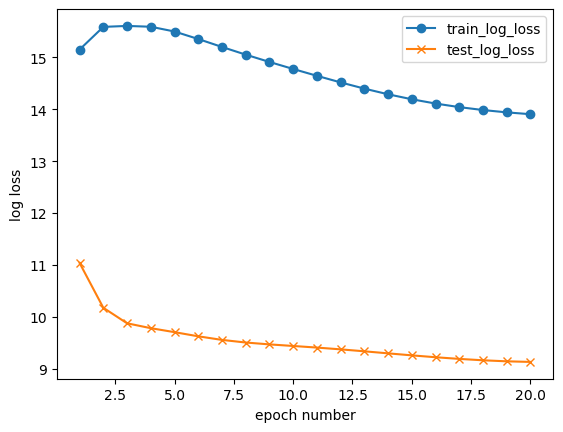

In [132]:
#plotting the training and testing loss
epoch = [i for i in range(1,21,1)]
plt.plot(epoch,train_loss ,marker='o', label='train_log_loss')
plt.plot(epoch,test_loss, marker='x', label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show

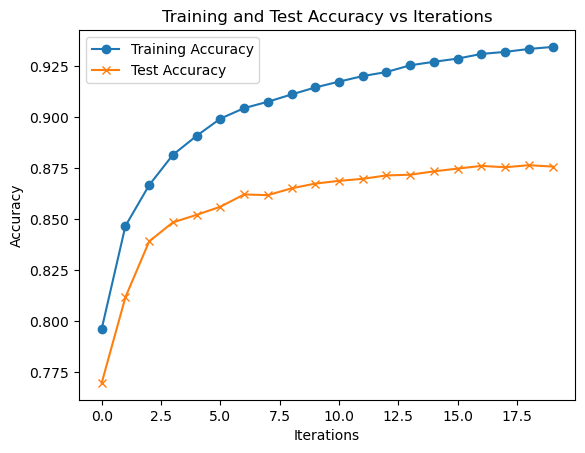

In [133]:
plt.plot(range(len(train_accuracy)), train_accuracy, marker='o', label='Training Accuracy')
plt.plot(range(len(test_accuracy)), test_accuracy, marker='x', label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Iterations')
plt.legend()
plt.show()

# Stochastic Gradient Descent: Mini Batch size = 1

In [106]:
def sgd_fit(x_train,y_train,x_test,y_test,lr,epochs):
    weights,bias = init(x_train)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    total_operations = 0
    for epoch in range(epochs):
            #softmax_train = np.zeros(x_test.shape)
            #softmax_test = np.zeros(y_test.shape)
            #train_pred = np.zeros(x_train.shape[0])  # Initialize as NumPy array
            #test_pred = np.zeros(x_test.shape[0])
        for i in range(x_train.shape[0]):
            yhat = feed_forward(x_train[i],weights,bias)
            total_operations += x_train.shape[1] + yhat.size
            dw = np.outer(x_train[i],(y_train[i] - yhat)) 
            db = (y_train[i] - yhat)
            total_operations += x_train.shape[1] * yhat.size  # Operations for dw
            total_operations += yhat.size  # Operations for db
            weights += lr * dw
            bias += lr * db
            if (epoch * x_train.shape[0] + i + 1) % 5000 == 0:
                train_pred = np.zeros(x_train.shape[0])
                for j in range(x_train.shape[0]):
                    softmax_train = feed_forward(x_train[j],weights,bias)
                    train_pred[j] = np.argmax(softmax_train)
                loss1 = compute_loss(y_train,softmax_train)
                accuracy1 = compute_accuracy(y_train,train_pred)
                train_loss.append(loss1)
                train_accuracy.append(accuracy1)
                test_pred = np.zeros(x_test.shape[0])
                for i in range(x_test.shape[0]):
                    softmax_test = feed_forward(x_test[i],weights,bias)
                    test_pred[i] = np.argmax(softmax_test)
                loss2 = compute_loss(y_test,softmax_test)
                accuracy2 = compute_accuracy(y_test,test_pred)
                test_loss.append(loss2)
                test_accuracy.append(accuracy2)
                total_operations += (y_train.shape[1] * softmax_train.shape[0])  # For loss
                total_operations += y_train.shape[0]  # For accuracy calculation
                print(f'Epoch {epoch + 1}, Sample {epoch * x_train.shape[0] + i + 1} => Train Loss: {loss1:.4f}, Test Loss: {loss2:.4f}, Train Accuracy: {accuracy1:.4f}, Test Accuracy: {accuracy2:.4f}')
    print(f'Total operations: {total_operations}')  # Print the total operations
    batch_numbers = [0] + [(epoch * x_train.shape[0] + i + 1) // 5000 for epoch in range(epochs) for i in range(x_train.shape[0]) if (epoch * x_train.shape[0] + i + 1) % 5000 == 0]
    return weights,bias,train_loss,test_loss,train_accuracy,test_accuracy,batch_numbers

In [108]:
weights_sgd,bias_sgd,train_loss_sgd,test_loss_sgd,train_accuracy_sgd,test_accuracy_sgd,batch_numbers = sgd_fit(x_train,y_train,x_test,y_test,0.01,20)

Epoch 1, Sample 3000 => Train Loss: 13.0016, Test Loss: 10.6441, Train Accuracy: 0.7549, Test Accuracy: 0.7277
Epoch 2, Sample 10000 => Train Loss: 13.3274, Test Loss: 8.8731, Train Accuracy: 0.8149, Test Accuracy: 0.7893
Epoch 3, Sample 17000 => Train Loss: 13.6508, Test Loss: 10.2138, Train Accuracy: 0.8471, Test Accuracy: 0.8283
Epoch 3, Sample 17000 => Train Loss: 14.4248, Test Loss: 11.7281, Train Accuracy: 0.8641, Test Accuracy: 0.8390
Epoch 4, Sample 24000 => Train Loss: 14.0892, Test Loss: 10.1270, Train Accuracy: 0.8714, Test Accuracy: 0.8370
Epoch 5, Sample 31000 => Train Loss: 13.9681, Test Loss: 10.1573, Train Accuracy: 0.8819, Test Accuracy: 0.8507
Epoch 5, Sample 31000 => Train Loss: 14.5033, Test Loss: 10.4319, Train Accuracy: 0.8873, Test Accuracy: 0.8513
Epoch 6, Sample 38000 => Train Loss: 14.1657, Test Loss: 9.2378, Train Accuracy: 0.8979, Test Accuracy: 0.8620
Epoch 7, Sample 45000 => Train Loss: 13.9610, Test Loss: 7.9819, Train Accuracy: 0.9024, Test Accuracy: 0.8

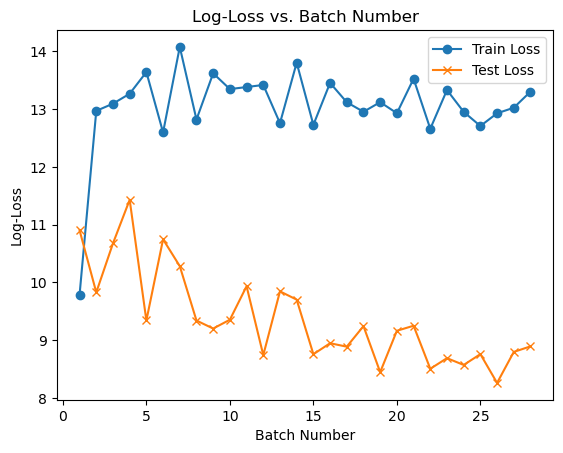

In [27]:
plt.plot(batch_numbers[1:], train_loss_sgd, marker='o', label='Train Loss')
plt.plot(batch_numbers[1:], test_loss_sgd, marker='x', label='Test Loss')
plt.title('Log-Loss vs. Batch Number')
plt.xlabel('Batch Number')
plt.ylabel('Log-Loss')
plt.legend()
plt.show()

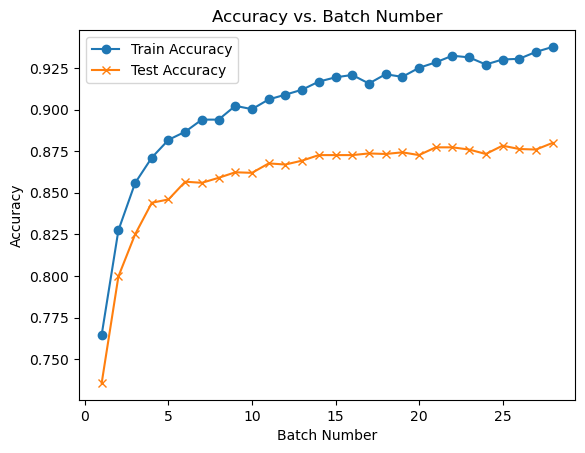

In [29]:
plt.plot(batch_numbers[1:], train_accuracy_sgd, marker='o', label='Train Accuracy')
plt.plot(batch_numbers[1:], test_accuracy_sgd, marker='x', label='Test Accuracy')
plt.title('Accuracy vs. Batch Number')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Stochastic Gradient Descent: Mini Batch size = 100

In [81]:
def mini_batch_fit(x_train,y_train,x_test,y_test,lr,epochs,batch_size):
    weights,bias = init(x_train)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    total_operations = 0
    num_classes = y_train.shape[1] 
    for epoch in range(epochs):
        indices = np.random.permutation(x_train.shape[0])
        softmax_train = np.zeros((x_train.shape[0], num_classes))
        softmax_test = np.zeros((x_test.shape[0], num_classes))
        #train_pred = np.zeros(x_train.shape[0])  # Initialize as NumPy array
        #test_pred = np.zeros(x_test.shape[0])
        for i in range(0,x_train.shape[0],batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = x_train[batch_indices]
            y_batch = y_train[batch_indices]
            #initialize gradients
            dw = np.zeros_like(weights)
            db = np.zeros_like(bias)
            for j in range(x_batch.shape[0]):
                yhat = feed_forward(x_batch[j],weights,bias)
                dw += np.outer(x_batch[j],(y_batch[j] - yhat))    #accumulating gradients
                db += (y_batch[j] - yhat)
            # Average the gradients
            dw /= x_batch.shape[0]
            db /= x_batch.shape[0]
            #update the weights
            weights += lr * dw
            bias += lr * db
            total_operations += (x_batch.shape[0] * (x_batch.shape[1] + num_classes))  # D + C
            # Loss and gradient calculations
            total_operations += (x_batch.shape[0] * (num_classes + x_batch.shape[1] * num_classes))  # Loss + gradient
            if (epoch * x_train.shape[0] + i + batch_size) % 5000 == 0:
                train_pred = np.zeros(x_train.shape[0])
                for j in range(x_train.shape[0]):
                    softmax_train[j] = feed_forward(x_train[j],weights,bias)
                    train_pred[j] = np.argmax(softmax_train[j])
                loss1 = compute_loss(y_train,softmax_train)
                accuracy1 = compute_accuracy(y_train,train_pred)
                train_loss.append(loss1)
                train_accuracy.append(accuracy1)
                test_pred = np.zeros(x_test.shape[0])
                for i in range(x_test.shape[0]):
                    softmax_test[i] = feed_forward(x_test[i],weights,bias)
                    test_pred[i] = np.argmax(softmax_test[i])
                loss2 = compute_loss(y_test,softmax_test)
                accuracy2 = compute_accuracy(y_test,test_pred)
                test_loss.append(loss2)
                test_accuracy.append(accuracy2)
                current_batch = (epoch * x_train.shape[0] + i + batch_size) // batch_size
                print(f'Epoch {epoch + 1}, (Batch {current_batch}), Sample {epoch * x_train.shape[0] + i + batch_size} => Train Loss: {loss1:.4f}, Test Loss: {loss2:.4f}, Train Accuracy: {accuracy1:.4f}, Test Accuracy: {accuracy2:.4f}')
    #batch_numbers = [0] + [(epoch * x_train.shape[0] + i + 1) // 5000 for epoch in range(epochs) for i in range(x_train.shape[0]) if (epoch * x_train.shape[0] + i + 1) % 5000 == 0]
    print(f'Total operations to reach comparable performance: {total_operations}')
    return weights,bias,train_loss,test_loss,train_accuracy,test_accuracy

In [83]:
weights_minib,bias_minib,train_loss_minib,test_loss_minib,train_accuracy_minib,test_accuracy_minib = mini_batch_fit(x_train,y_train,x_test,y_test,0.1,100,100)

Epoch 1, (Batch 30), Sample 3099 => Train Loss: 4.9524, Test Loss: 5.1476, Train Accuracy: 0.3229, Test Accuracy: 0.3083
Epoch 2, (Batch 100), Sample 10099 => Train Loss: 3.2988, Test Loss: 3.5093, Train Accuracy: 0.4710, Test Accuracy: 0.4483
Epoch 3, (Batch 170), Sample 17099 => Train Loss: 2.5274, Test Loss: 2.7419, Train Accuracy: 0.5656, Test Accuracy: 0.5387
Epoch 3, (Batch 170), Sample 17099 => Train Loss: 2.0952, Test Loss: 2.3034, Train Accuracy: 0.6159, Test Accuracy: 0.5923
Epoch 4, (Batch 240), Sample 24099 => Train Loss: 1.8233, Test Loss: 2.0213, Train Accuracy: 0.6594, Test Accuracy: 0.6357
Epoch 5, (Batch 310), Sample 31099 => Train Loss: 1.6238, Test Loss: 1.8272, Train Accuracy: 0.6909, Test Accuracy: 0.6633
Epoch 5, (Batch 310), Sample 31099 => Train Loss: 1.4789, Test Loss: 1.6694, Train Accuracy: 0.7114, Test Accuracy: 0.6803
Epoch 6, (Batch 380), Sample 38099 => Train Loss: 1.3696, Test Loss: 1.5625, Train Accuracy: 0.7314, Test Accuracy: 0.7040
Epoch 7, (Batch 45

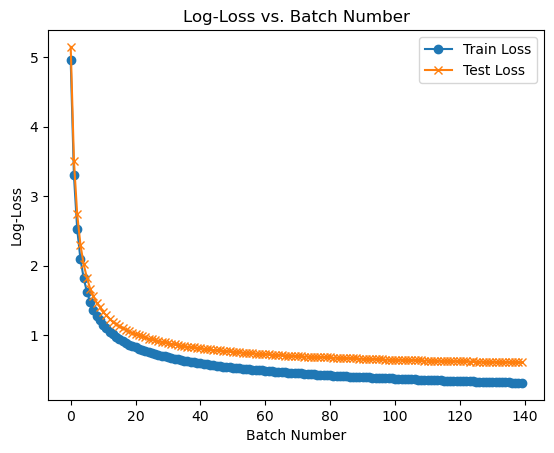

In [84]:
plt.plot(range(len(train_loss_minib)), train_loss_minib, marker='o', label='Train Loss')
plt.plot(range(len(test_loss_minib)), test_loss_minib, marker='x', label='Test Loss')
plt.title('Log-Loss vs. Batch Number')
plt.xlabel('Batch Number')
plt.ylabel('Log-Loss')
plt.legend()

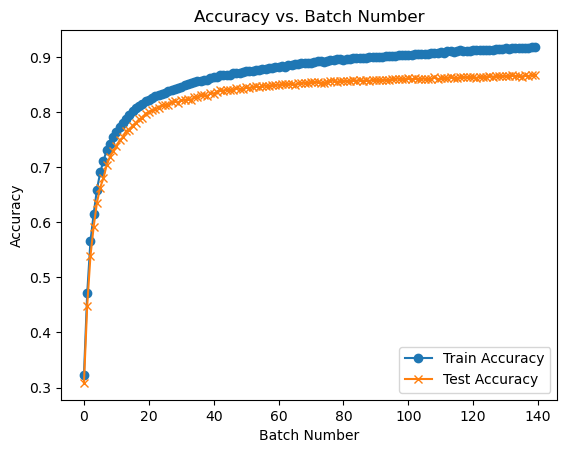

In [85]:
plt.plot(range(len(train_accuracy_minib)), train_accuracy_minib, marker='o', label='Train Accuracy')
plt.plot(range(len(test_accuracy_minib)), test_accuracy_minib, marker='x', label='Test Accuracy')
plt.title('Accuracy vs. Batch Number')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.legend()

In [137]:
outFile = 'HW4_aditi_model_weights.hdf5'

with h5py.File(outFile, 'w') as hf:
    hf.create_dataset('W', data = np.asarray(weights))
    hf.create_dataset('W', data = np.asarray(weights_sgd))
    hf.create_dataset('W', data = np.asarray(weights_minib))
    hf.create_dataset('b', data = np.asarray(bias))
    hf.create_dataset('b', data = np.asarray(bias_sgd))
    hf.create_dataset('b', data = np.asarray(bias_minib))

ValueError: Unable to create dataset (name already exists)